# **Final Project 2 : SVM dan Logic Regression**


Group 2

1.   Farisa Fikri Mumtaza (PYTN-KS20-03)
2.   Ilham Yusuf (PYTN-KS20-06)
3.   Ditha Tul Nugraha (PYTN-KS20-015)

# **A. Introduce**

Informasi cuaca yang akurat dapat membantu individu dan organisasi dalam membuat keputusan terkait dengan aktivitas harian, keselamatan, dan perencanaan jangka panjang dan juga menjadi kunci dalam berbagai sektor, termasuk pertanian, transportasi, pariwisata, dan manajemen bencana.

Data yang akan digunakan adalah data observasi cuaca selama 10 tahun dari beberapa weather station di Australia.

Kita akan membuat model yang memberikan prediksi cuaca dengan akurasi tinggi, meminimalkan kesalahan prediksi.Prediksi akan dinyatakan hujan bila hujan diatas 1mm pada hari tersebut.

Metode yang dipakai untuk memprediksi dalam project ini adalah SVM dan Logistic Regression. Setelah membuat model, dilakukan deployment untuk model terbaik yang didapatkan dan akan dipakai untuk model inference.

# **B.Import Library**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.diagnostic import normal_ad

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from scipy.stats import skew
from sklearn.pipeline import make_pipeline

import sys

import pickle

if not sys.warnoptions:
    import warnings

    warnings.filterwarnings("ignore", category=RuntimeWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format
%matplotlib inline
sns.set(style='darkgrid')
params = { 'axes.labelsize': 12, 'xtick.labelsize': 12,
          'ytick.labelsize': 12, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)

# **C. Load Data**

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.400000,22.900000,0.600000,NaN,NaN,W,44.000000,W,WNW,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,NaN,16.900000,21.800000,No,No
1,2008-12-02,Albury,7.400000,25.100000,0.000000,NaN,NaN,WNW,44.000000,NNW,WSW,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,NaN,NaN,17.200000,24.300000,No,No
2,2008-12-03,Albury,12.900000,25.700000,0.000000,NaN,NaN,WSW,46.000000,W,WSW,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,NaN,2.000000,21.000000,23.200000,No,No
3,2008-12-04,Albury,9.200000,28.000000,0.000000,NaN,NaN,NE,24.000000,SE,E,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,NaN,NaN,18.100000,26.500000,No,No
4,2008-12-05,Albury,17.500000,32.300000,1.000000,NaN,NaN,W,41.000000,ENE,NW,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,NaN,NaN,E,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,NaN,NaN,10.100000,22.400000,No,No
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,NaN,NaN,NNW,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,NaN,NaN,10.900000,24.500000,No,No
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,NaN,NaN,N,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,NaN,NaN,12.500000,26.100000,No,No
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,NaN,NaN,SE,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,No,No


**mendapatkan dimensi dari dataframe**

In [ ]:
df.shape

(145460, 23)

Data diatas terdiri dari 23 kolom dan 145460 baris

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

# **D.Data Cleaning**

**Check Data Types**

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**Change Data Types**

In [ ]:
# Ubah tipe data
df['Date'] = pd.to_datetime(df['Date'])

# Setelah dirubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

**Check Data null/Data kosong**

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Check Duplicated Data (Data yang terduplikat)**

In [ ]:
df.duplicated().sum()

0

**Inpute Missing Values**

Input missing values dengan terlebih dahulu meng-ngecek distribusi kolom numerik

 *H0*: Setiap kolom berisi data numerik terdistribusi secara normal //
 *H1*: Setiap kolom berisi data numerik tidak terdistribusi secara normal

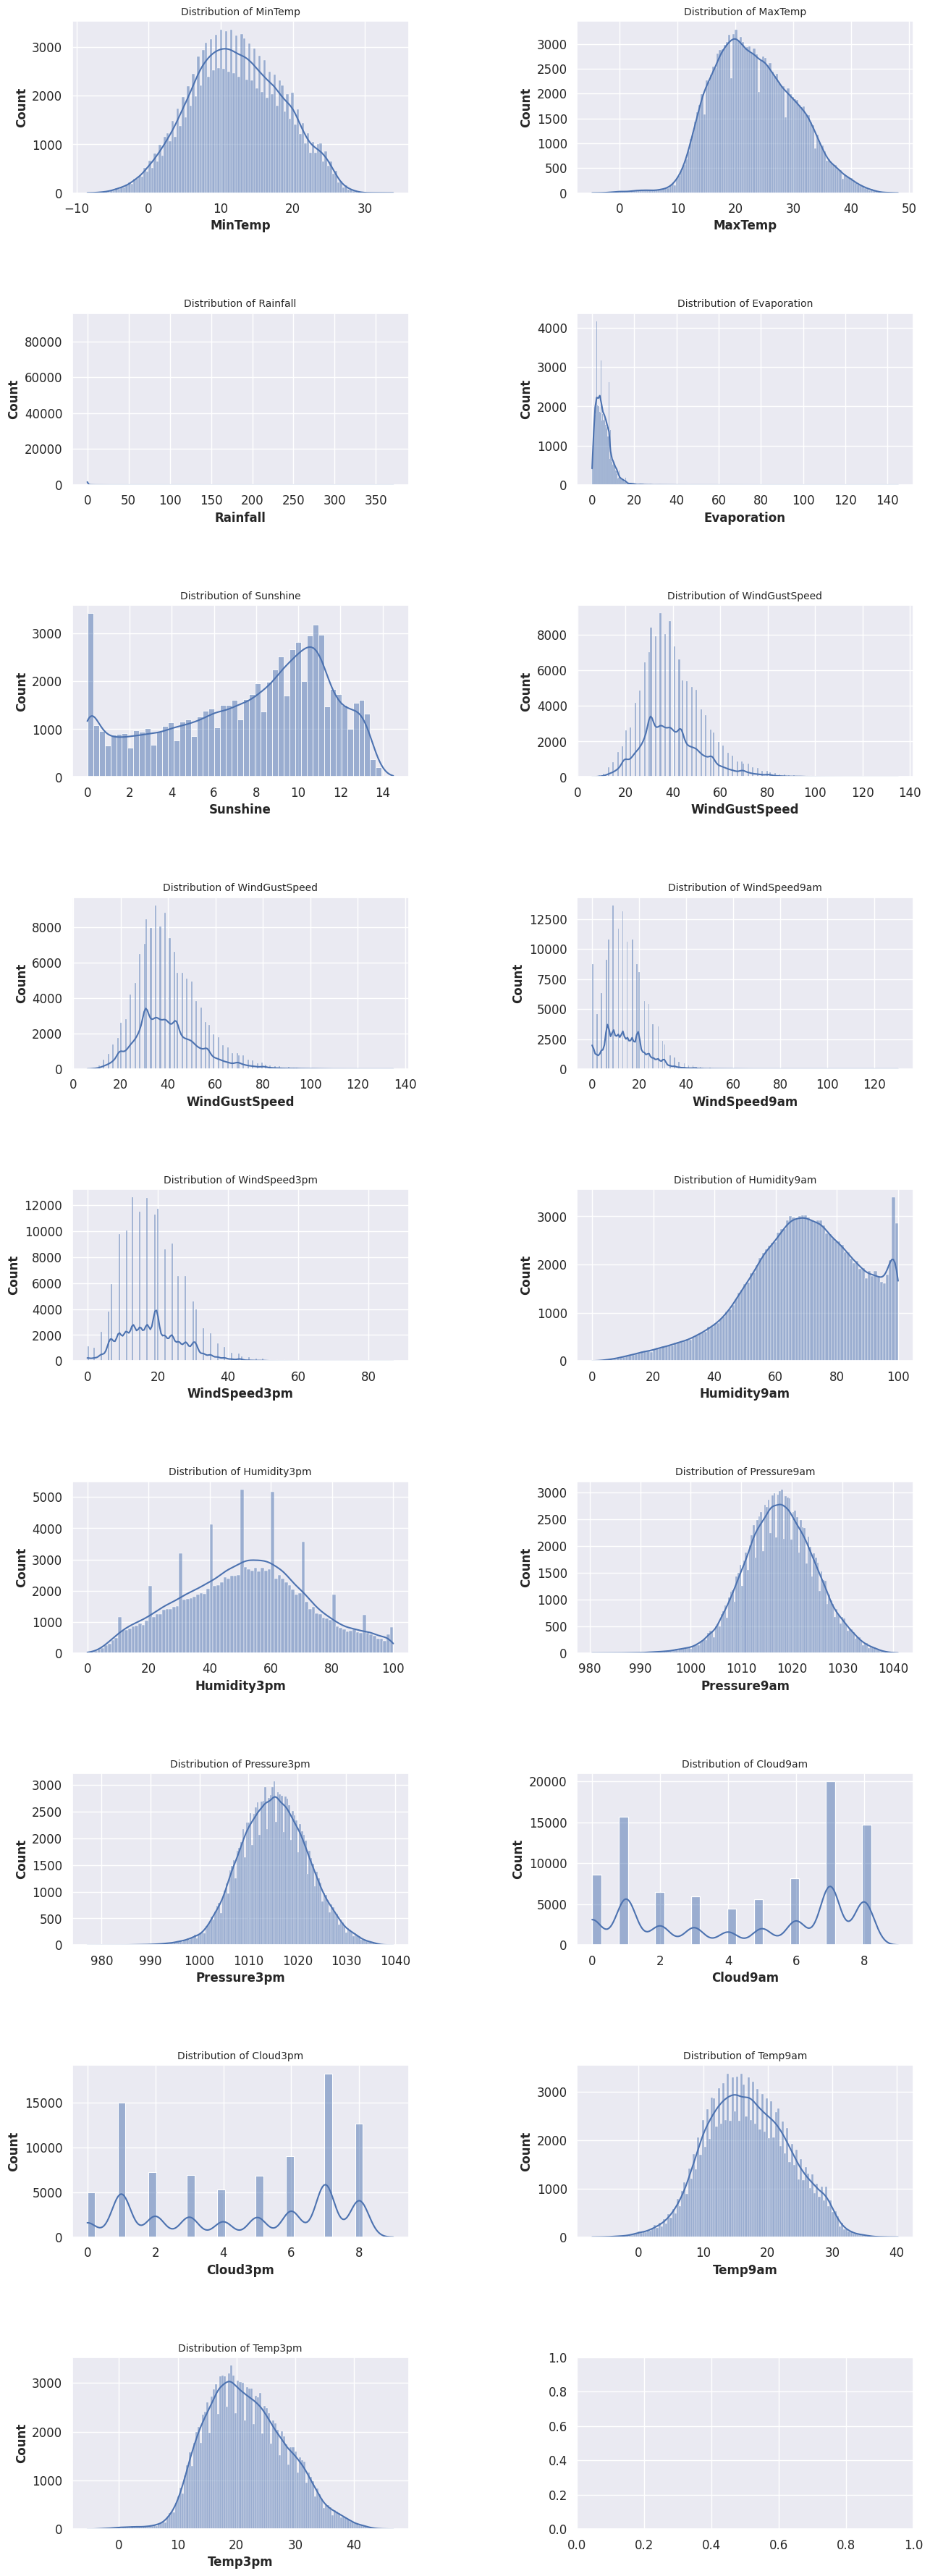

In [ ]:
dist1  = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
        'Cloud3pm', 'Temp9am', 'Temp3pm']

def stacked_dist(df, columns):
    length = len(columns)

    # Hitung jumlah baris (row) sesuai dengan jumlah kolom
    if length % 2 == 0:
        row = length // 2
    else:
        row = length // 2 + 1

    # Membuat subplot
    fig, axes = plt.subplots(row, 2, figsize=(15, 5 * row))
    fig.subplots_adjust(hspace=0.7, wspace=0.5)

    # Iterasi untuk membuat plot
    for i in range(length):
        ax = axes[i // 2, i % 2] if length > 1 else axes

        sns.histplot(df[columns[i]], kde=True, ax=ax)
        ax.set_title(f"Distribution of {columns[i]}", fontsize=10)

    # Menampilkan plot
    plt.show()

# Panggil fungsi dengan dataframe df dan daftar kolom dist1
stacked_dist(df, dist1)


**Central tendency dan p-value**

In [ ]:
central_tendency = pd.DataFrame({'Kolom':dist1,
                                 'Mean':[df[i].mean()  for i in dist1],
                                'Median':[df[i].median()  for i in dist1],
                                'Modus': [df[i].mode()[0]  for i in dist1],
                                'p-value': [normal_ad(df[i])[1] for i in dist1],
                                'skewness': [skew(df[i]) for i in dist1]})
central_tendency['check'] = central_tendency['p-value']<0.05
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Kolom,Mean,Median,Modus,p-value,skewness,check,skew
0,MinTemp,12.194034,12.000000,11.000000,0.000000,NaN,True,Right skewed
1,MaxTemp,23.221348,22.600000,20.000000,0.000000,NaN,True,Right skewed
2,Rainfall,2.360918,0.000000,0.000000,0.000000,NaN,True,Right skewed
3,Evaporation,5.468232,4.800000,4.000000,0.000000,NaN,True,Right skewed
4,Sunshine,7.611178,8.400000,0.000000,0.000000,NaN,True,Left skewed
5,WindGustSpeed,40.035230,39.000000,35.000000,0.000000,NaN,True,Right skewed
6,WindGustSpeed,40.035230,39.000000,35.000000,0.000000,NaN,True,Right skewed
7,WindSpeed9am,14.043426,13.000000,9.000000,0.000000,NaN,True,Right skewed
8,WindSpeed3pm,18.662657,19.000000,13.000000,0.000000,NaN,True,Left skewed
9,Humidity9am,68.880831,70.000000,99.000000,0.000000,NaN,True,Left skewed


 *H0* ditolak karena p-value setiap kolom lebih kecil dari 0.05, maka kolom-kolom diatas tidak terdistribusi secara normal. Karena kolom-kolom berisi data numberik akan di impute oleh median dari masing-masing kolom.

In [ ]:
for i in dist1:
    df[i].fillna(df[i].median(), inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Untuk data kolom kategorikal yaitu WindGustDir, WindDir9am, WindDir3pm, RainToday dan RainTomorrow masih terdapat nilai NaN,maka dari itu akan di impute oleh modus dari masing masing kolom.

In [ ]:
for i in ['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday' ,'RainTomorrow']:
    df[i].fillna(df[i].mode()[0], inplace=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

data sudah tidak memiliki nol values.

# **E. EDA**

**Rata-rata Temperatur dari Tahun ke tahun**

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,4.800000,8.400000,E,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,5.000000,5.000000,10.100000,22.400000,No,No,2017,6
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,4.800000,8.400000,NNW,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,5.000000,5.000000,10.900000,24.500000,No,No,2017,6
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,4.800000,8.400000,N,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,5.000000,5.000000,12.500000,26.100000,No,No,2017,6
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,4.800000,8.400000,SE,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,No,No,2017,6
145459,2017-06-25,Uluru,14.900000,22.600000,0.000000,4.800000,8.400000,W,39.000000,ESE,ESE,17.000000,17.000000,62.000000,36.000000,1020.200000,1017.900000,8.000000,8.000000,15.000000,20.900000,No,No,2017,6


In [ ]:
grouped = df[['MinTemp','year']].groupby(['year'], as_index=False).agg({'MinTemp':'mean'})
grouped

,year,MinTemp
0,2007,12.545902
1,2008,12.448811
2,2009,12.158282
3,2010,12.091962
4,2011,12.022263
5,2012,11.228425
6,2013,11.897393
7,2014,12.402533
8,2015,12.230254
9,2016,12.558057


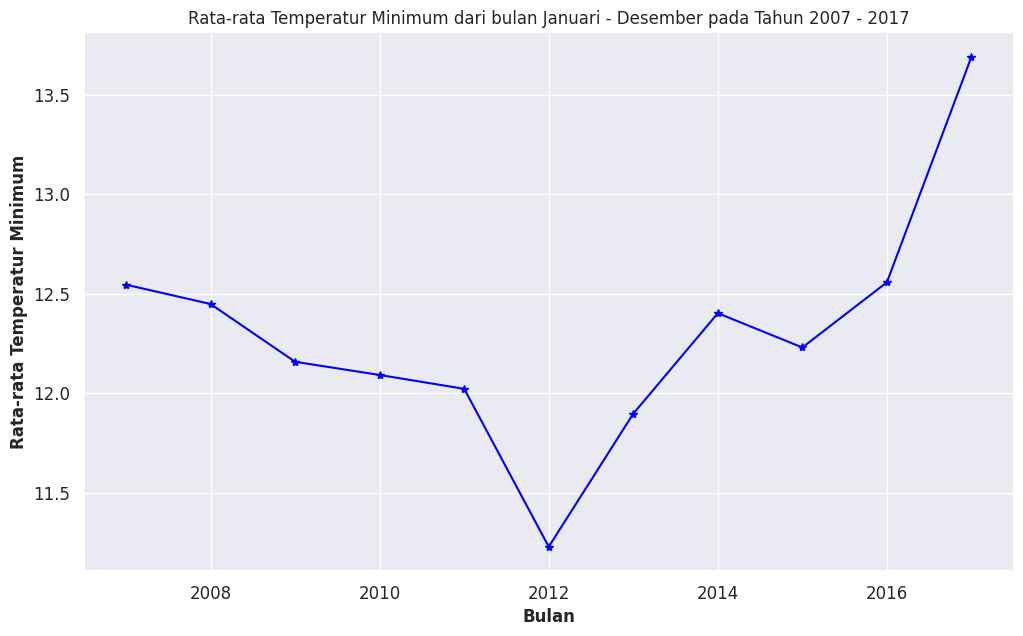

In [ ]:
grouped.plot(kind='line',
                x='year',
                y='MinTemp',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Rata-rata Temperatur Minimum dari bulan Januari - Desember pada Tahun 2007 - 2017")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Temperatur Minimum")
plt.show()

Dari grafik di atas, dapat dilihat  rata-rata temperatur terkecil setiap tahunnya fluktuatif. Temperatur terendah dicapai di tahun 2012 dengan rata-rata temperatur sebesar 11.22 derajat celcius. Sedangkan rata-rata temperatur tertinggi ada pada tahun 2017 degan rata-rata suhu sebesar 13.69 derajat celsius

In [ ]:
grouped1 = df[['MaxTemp','year']].groupby(['year'], as_index=False).agg({'MaxTemp':'mean'})
grouped1

,year,MaxTemp
0,2007,25.086885
1,2008,22.873392
2,2009,23.244892
3,2010,22.571493
4,2011,22.540358
5,2012,22.312304
6,2013,23.288705
7,2014,23.787537
8,2015,23.494610
9,2016,23.409239


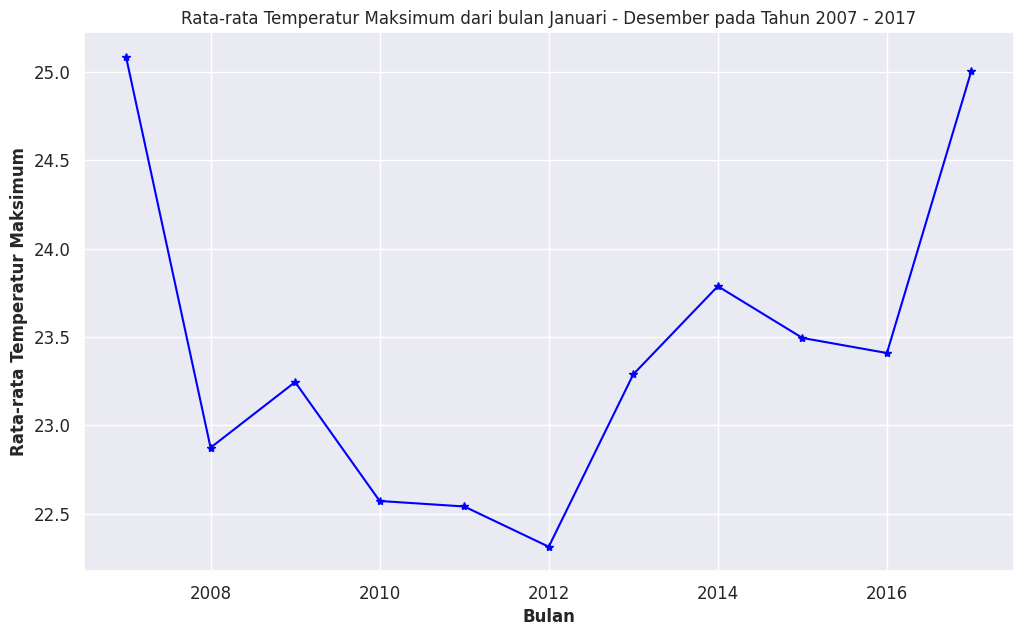

In [ ]:
grouped1.plot(kind='line',
                x='year',
                y='MaxTemp',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Rata-rata Temperatur Maksimum dari bulan Januari - Desember pada Tahun 2007 - 2017")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Temperatur Maksimum")
plt.show()

Dari grafik diatas, Temperatur Maksimum dari tahun ke tahun juga fluktuatif. Temperatur tertinggi ada pada tahun 2007 sebesar 25.09 derajat celsius dan temperatur maksimum terendah ada pada tahun 2012 sebesar 22.31 derajat celsius.

**Menentukan Presentase Seberapa sering turunnya hujan berdasarkan Lokasi**

In [ ]:
grouped3 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'count'}).sort_values(by='Rainfall', ascending=False).head(5)
grouped3

,Location,Rainfall
33,Portland,1094
8,Cairns,950
43,Walpole,949
22,MountGambier,921
12,Dartmoor,921


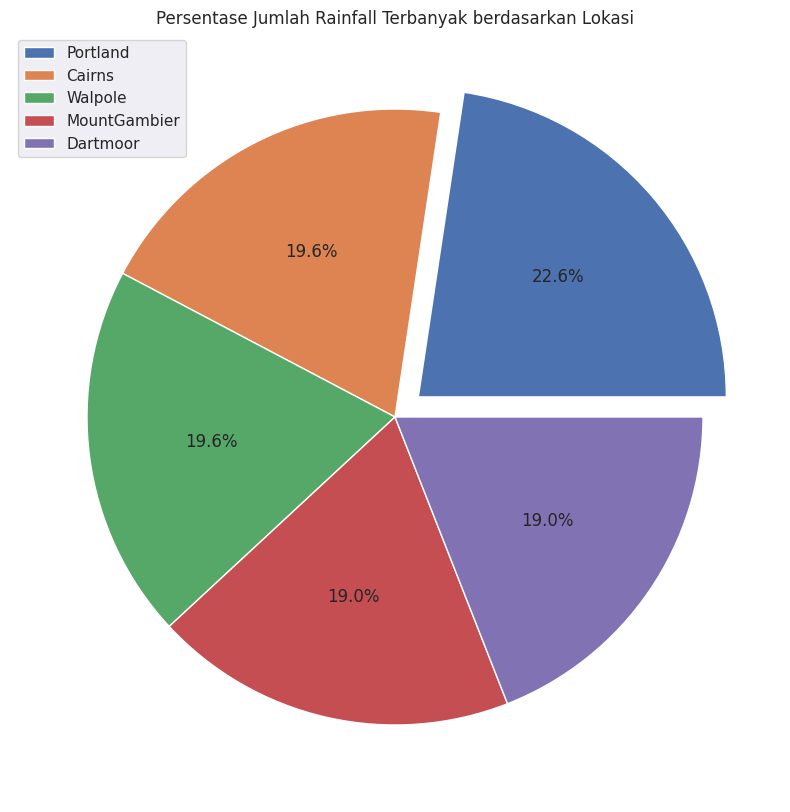

In [ ]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(grouped3['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Jumlah Rainfall Terbanyak berdasarkan Lokasi')
plt.legend(labels=grouped3.Location, loc='upper left')
plt.show()

In [ ]:
grouped4 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'mean'}).sort_values(by='Rainfall', ascending=False).head(5)
grouped4

,Location,Rainfall
39,Townsville,20.084231
13,Darwin,18.975352
16,Katherine,18.701509
8,Cairns,17.858947
11,CoffsHarbour,17.016801


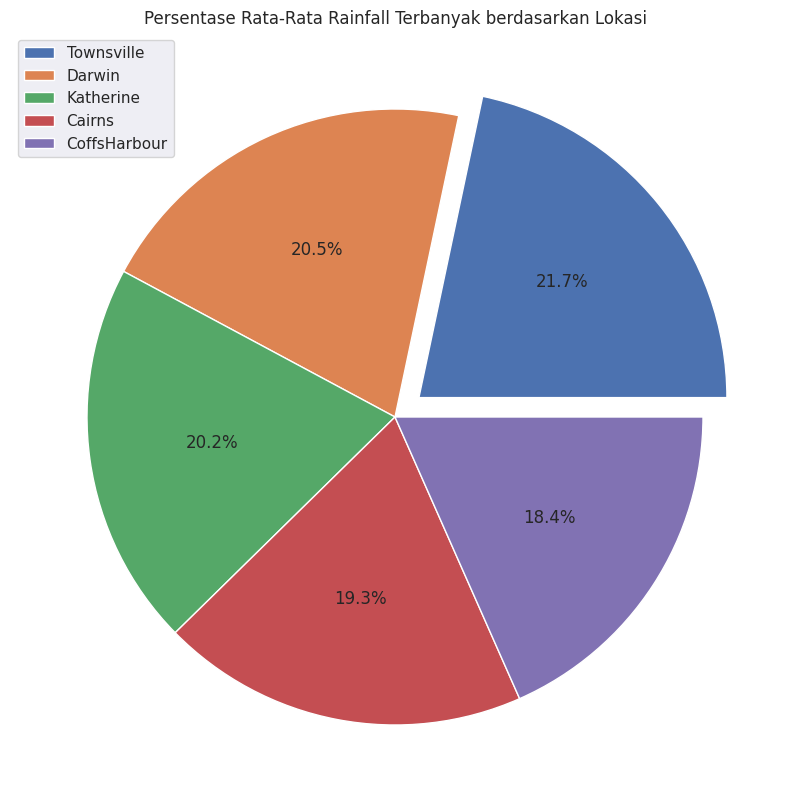

In [ ]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(grouped4['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Rata-Rata Rainfall Terbanyak berdasarkan Lokasi')
plt.legend(labels=grouped4.Location, loc='upper left')
plt.show()

Lokasi dengan frekuensi hujan paling banyak adalah Portland, sedangkan rata-rata banyaknya hujan adalah di Townsville dengan rata-rata curah hujan sebesar 20.08mm selama 10 tahun terakhir.

** Data Correlation**

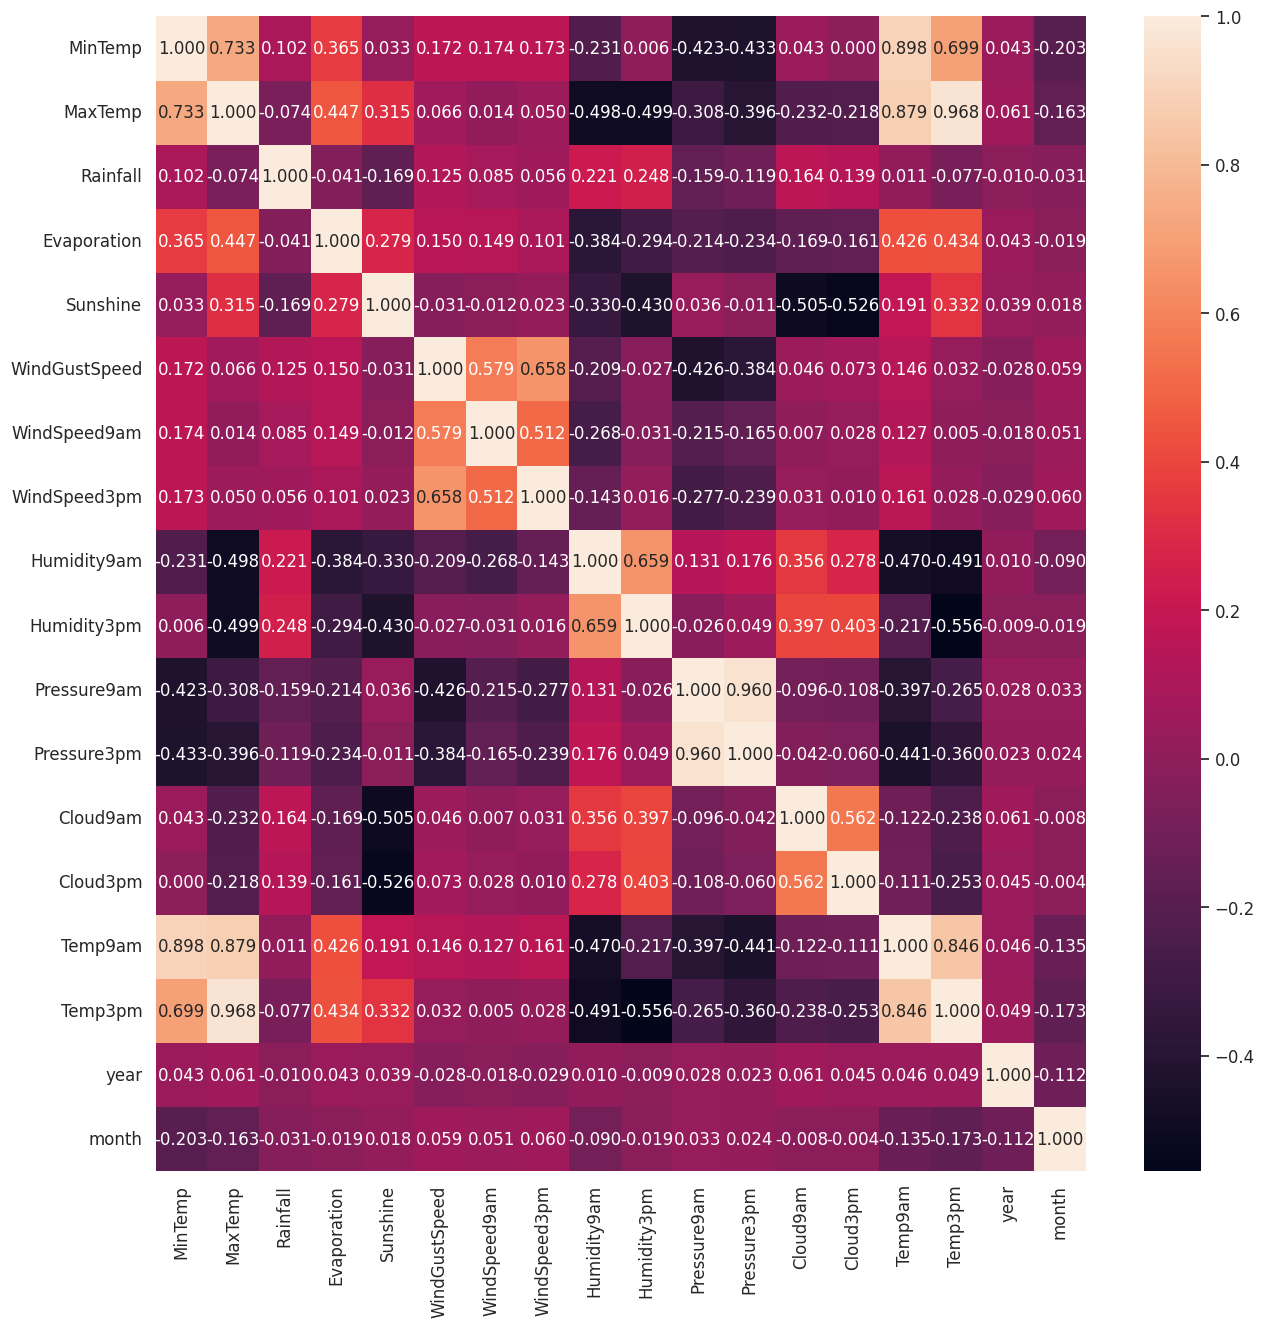

In [ ]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f")
plt.show()

Dari grafik diatas dapat dilihat bahwa korelasi terkuat ada pada kolom Temp3pm dan MaxTemp dengan korelasi sebesar 0.962.

# **F. Data Processing**

**Label Encoding**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [ ]:
categorical = df[['WindGustDir']]
for catcol in categorical:
    dummies = pd.get_dummies(df[catcol], prefix=catcol, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([catcol], axis = 1)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.400000,22.900000,0.600000,4.800000,8.400000,44.000000,W,WNW,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,5.000000,16.900000,21.800000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.400000,25.100000,0.000000,4.800000,8.400000,44.000000,NNW,WSW,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,5.000000,5.000000,17.200000,24.300000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,12.900000,25.700000,0.000000,4.800000,8.400000,46.000000,W,WSW,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,5.000000,2.000000,21.000000,23.200000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.200000,28.000000,0.000000,4.800000,8.400000,24.000000,SE,E,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,5.000000,5.000000,18.100000,26.500000,0,0,2008,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.500000,32.300000,1.000000,4.800000,8.400000,41.000000,ENE,NW,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,4.800000,8.400000,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,5.000000,5.000000,10.100000,22.400000,0,0,2017,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,4.800000,8.400000,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,5.000000,5.000000,10.900000,24.500000,0,0,2017,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,4.800000,8.400000,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,5.000000,5.000000,12.500000,26.100000,0,0,2017,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,4.800000,8.400000,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,0,0,2017,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Drop Unnecessary Columns (drop kolom yang tidak digunakan)**

Membuang kolom Date, month, year, dan location  karena tidak berpengaruh pada prediksi dan membuang kolom WindDir9am serta WindDir3pm karena telah direpresentasikan oleh kolom WindGustDir.

In [ ]:
df.drop(['Date','month','year', 'WindDir9am','WindDir3pm', 'Location'], axis=1, inplace=True)

**Split Data (Pembagian Data)**

Data akan dibagi menjadi 75% training data dan 25% testing data.

In [ ]:
train, test = train_test_split(df, test_size=0.25, random_state=2)
train_index = train.index
test_index = test.index

In [ ]:
x_train = train.drop(['RainTomorrow'],axis=1)
y_train = train[['RainTomorrow']]
x_test = test.drop(['RainTomorrow'],axis=1)
y_test = test[['RainTomorrow']]

**Scale Data (mengubah nilai dalam data)**

nilai dalam dataset diubah sehingga dapat memiliki skala yang seragam atau relatif serupa.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **G. Logistic Regression**

**Definisi Dan Pelatihan Model**

In [ ]:
y_train = y_train.values.ravel()

lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

**Evaluasi Model**

In [ ]:
print(lr_model.intercept_)
print(lr_model.coef_)

[-1.85834169]
[[ 7.40278194e-03 -2.45631942e-01  7.32543182e-02 -1.42880739e-02
  -3.01595927e-01  6.58991671e-01 -1.04502517e-01 -1.95143701e-01
   5.99042602e-02  1.09784510e+00  7.38248894e-01 -1.11179270e+00
   2.03550274e-02  2.85367912e-01  1.17117026e-01  2.07354794e-01
   2.29384213e-01  1.33461464e-02  1.72438931e-02  7.81685588e-02
  -1.68551180e-05  2.74431087e-02  8.32383467e-02  8.50188986e-02
   1.95276540e-02  2.68217008e-02  2.38306782e-02  3.59448576e-02
   5.17564911e-02  7.02668309e-02  7.31697094e-02  4.40331520e-02]]


In [ ]:
lr_train_accuracy = lr_model.score(x_train,y_train)
lr_train_accuracy

0.8446583253128007

Akurasi dari model Logistic Regression diatas sebesar 84% untuk training data.

**Confusion Matrix**

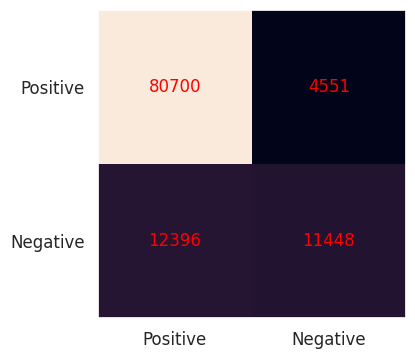

In [ ]:
cm = confusion_matrix(y_train, lr_model.predict(x_train))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

In [ ]:
y_pred = lr_model.predict(x_train)
train['Estimated RainTomorrow'] = np.round(y_pred,2)
total = train['Sunshine'].count()
total_correct = train['Sunshine'][train['RainTomorrow']==train['Estimated RainTomorrow']].count()
total_wrong = train['Sunshine'][train['RainTomorrow']!=train['Estimated RainTomorrow']].count()
print(' total correct prediction sebesar', total_correct/total*100)
print(' total wrong prediction sebesar',total_wrong/total*100)

 total correct prediction sebesar 84.46583253128007
 total wrong prediction sebesar 15.534167468719923


Dari Confusion matrix diatas menunjukkan bahwa nilai false positive lebih kecil dari true positive. Sedangkan jumlah false negative masih lebih besar daripada true negative.

**Model Inference**

In [ ]:
y_pred = lr_model.predict(x_test)
test['Estimated RainTomorrow'] = np.round(y_pred,2)
test.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
113343,13.500000,23.700000,0.000000,4.800000,8.400000,41.000000,22.000000,26.000000,52.000000,49.000000,1013.300000,1016.100000,5.000000,5.000000,22.500000,20.700000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31269,19.800000,25.000000,0.000000,7.800000,8.200000,39.000000,11.000000,24.000000,76.000000,48.000000,1021.600000,1021.300000,5.000000,5.000000,20.700000,24.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10625,9.200000,20.100000,0.000000,1.000000,1.700000,24.000000,2.000000,17.000000,83.000000,72.000000,1026.700000,1023.600000,7.000000,8.000000,14.500000,18.200000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
65630,19.900000,35.900000,0.000000,9.800000,7.200000,63.000000,46.000000,22.000000,39.000000,21.000000,1016.100000,1013.900000,4.000000,4.000000,26.400000,34.800000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48079,14.200000,25.400000,5.600000,4.800000,8.400000,44.000000,22.000000,15.000000,25.000000,18.000000,1014.300000,1014.700000,5.000000,5.000000,18.400000,23.900000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
lr_test_accuracy = lr_model.score(x_test,y_test)
lr_test_accuracy

0.8406709748384436

Didapatkan akurasi dari testing data sebesar 84%

**Confusion Matrix**

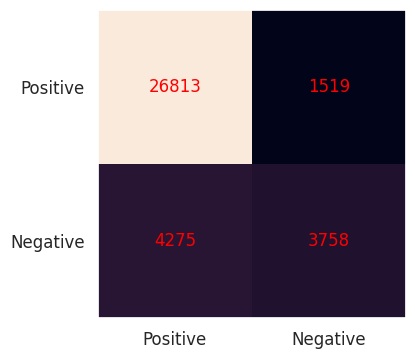

In [ ]:
cm = confusion_matrix(y_test, lr_model.predict(x_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

 confusion matrix diatas menunjukkan bahwa nilai false positive lebih kecil dari true positive. Sedangkan jumlah false negative masih lebih besar daripada true negative.

**Compare/ membandingkan data training dan data testing**

In [ ]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],'Tingkat Akurasi':[lr_train_accuracy, lr_test_accuracy]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.844658
1,Testing Data,0.840671


Hasil dari compare / membandingkan dari data diatas, tingkat akurasi testing data lebih kecil dari training data untuk model logistic regression. Dapat disimpulkan bahwa model ini  underfitting meskipun selisihnya tidak signifikan.

# H. Support Vector Machine (SVM)

In [ ]:
train.drop(['Estimated RainTomorrow'],axis=1,inplace=True)
test.drop(['Estimated RainTomorrow'],axis=1,inplace=True)

**Definisi dan Pelatihan Model**

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

**Evaluasi Model**

In [ ]:
y_predc =clf.predict(x_train)
svm_train_accuracy =  metrics.accuracy_score(y_train, y_predc)
print('Accuracy:',svm_train_accuracy)

Accuracy: 0.8440625143223796


Akurasi yang didapatkan dari training data dengan model SVM adalah sebesar 84%

In [ ]:
train['Estimated RainTomorrow'] = y_predc
train.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
33867,19.600000,24.700000,0.000000,9.000000,0.000000,41.000000,20.000000,19.000000,70.000000,66.000000,1021.200000,1021.100000,7.000000,7.000000,21.500000,21.100000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
84434,8.500000,23.200000,0.200000,2.600000,10.600000,26.000000,7.000000,13.000000,45.000000,47.000000,1022.300000,1019.600000,0.000000,1.000000,17.100000,21.800000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95816,27.000000,32.600000,4.000000,6.000000,8.500000,59.000000,13.000000,20.000000,74.000000,69.000000,1010.000000,1006.100000,6.000000,6.000000,29.800000,31.900000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
100879,7.400000,22.400000,0.000000,6.000000,10.100000,39.000000,20.000000,22.000000,75.000000,45.000000,1006.200000,1003.100000,3.000000,4.000000,15.800000,20.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
89256,18.300000,30.900000,0.000000,11.000000,10.900000,43.000000,19.000000,28.000000,51.000000,42.000000,1016.900000,1013.500000,1.000000,1.000000,26.400000,28.300000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Confusion Matrix**

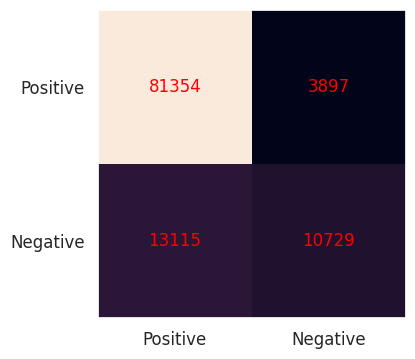

In [ ]:
cm = confusion_matrix(y_train, y_predc)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Dari hasil Confusion matrix diatas menunjukkan  nilai false positive lebih kecil dari true positive. Sedangkan jumlah false negative masih lebih besar daripada true negative.

**Model Inference**

In [ ]:
y_predc1 =clf.predict(x_test)
svm_test_accuracy =  metrics.accuracy_score(y_test, y_predc1)
print('Accuracy:', svm_test_accuracy)

Accuracy: 0.8398460057747834


In [ ]:
test['Estimated RainTomorrow'] = y_predc1
test.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
113343,13.500000,23.700000,0.000000,4.800000,8.400000,41.000000,22.000000,26.000000,52.000000,49.000000,1013.300000,1016.100000,5.000000,5.000000,22.500000,20.700000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31269,19.800000,25.000000,0.000000,7.800000,8.200000,39.000000,11.000000,24.000000,76.000000,48.000000,1021.600000,1021.300000,5.000000,5.000000,20.700000,24.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10625,9.200000,20.100000,0.000000,1.000000,1.700000,24.000000,2.000000,17.000000,83.000000,72.000000,1026.700000,1023.600000,7.000000,8.000000,14.500000,18.200000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
65630,19.900000,35.900000,0.000000,9.800000,7.200000,63.000000,46.000000,22.000000,39.000000,21.000000,1016.100000,1013.900000,4.000000,4.000000,26.400000,34.800000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48079,14.200000,25.400000,5.600000,4.800000,8.400000,44.000000,22.000000,15.000000,25.000000,18.000000,1014.300000,1014.700000,5.000000,5.000000,18.400000,23.900000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Confusion Matrix**

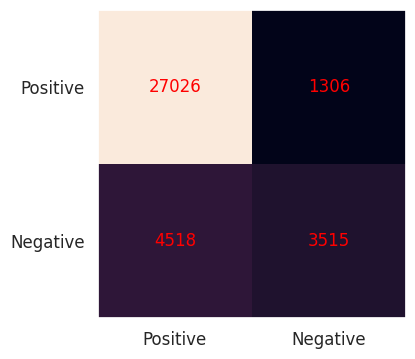

In [ ]:
cm = confusion_matrix(y_test, y_predc1)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Dari confusion matrix diatas, didapatkan jumlah true positive lebih besar dibandingkan false positive. Namun, jumlah true negative masih lebih kecil dibandingkan false negative.

**Compare/ membandingkan data training dan data testing**

In [ ]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],
                        'Tingkat Akurasi':[svm_train_accuracy, svm_test_accuracy]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.844063
1,Testing Data,0.839846


Hasil dari compare / membandingkan  data training dan data testis diatas, didapatkan hasil tingkat akurasi testing data lebih kecil dari training data untuk model SVM. Dapat disimpulkan bahwa model ini underfitting meskipun selisihnya tidak signifikan.

# **I. Membandingkan Model Logistic Regression dan Support vector Machine (SVM)**

In [ ]:
models = ['SVM', 'Logistic Regression']
akurasi_skor_training = {'Metode':models, 'Akurasi':[ svm_test_accuracy, lr_test_accuracy]}
akurasi_skor_training = pd.DataFrame(akurasi_skor_training)
akurasi_skor_training

,Metode,Akurasi
0,SVM,0.839846
1,Logistic Regression,0.840671


Dari perbandingan model Logistic Regression dan SVM, didapatkan hasil akurasi yang lebih tinggi dengan menggunakan model Logistic Regression yaitu 84.06% , sedangkan hasil akurasi yang didapat dengan model SVM yaitu 83.98%

# **J. Model Deployment**

**Menggunakan Model Logistic Regression**

Model yang akan digunakan adalah model Logistic Regression karena dari hasil perbandingan antara 2 model tersebut, didapatkan akurasi data testing yang lebih tinggi.

In [ ]:
with open("scaler.pkl", "wb")  as f:
    pickle.dump(scaler, f)

In [ ]:
with open("scaler.pkl", "wb")  as f:
    pickle.dump(lr_model, f)

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [ ]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28332
           1       0.71      0.47      0.56      8033

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.73     36365
weighted avg       0.83      0.84      0.83     36365



**Precesion**


*   Untuk kelas 0, precision sekitar 86%, menunjukkan bahwa sekitar 86% dari prediksi positif untuk kelas 0 adalah benar. Ini mengindikasikan model memiliki kemampuan yang baik untuk mengidentifikasi kelas 0.
*   Untuk kelas 1, precision sekitar 72%, menunjukkan bahwa sekitar 72% dari prediksi positif untuk kelas 1 adalah benar.Ini mengindikasikan model memiliki kemampuan yang baik untuk mengidentifikasi kelas 1.

**Recall**


*   Untuk kelas 0, recall sangat tinggi, sekitar 95%, menunjukkan bahwa model berhasil mengidentifikasi sekitar 95% dari semua instance yang sebenarnya milik kelas 0.
*   Untuk kelas 1, recall lebih rendah, sekitar 43%, menunjukkan bahwa model hanya berhasil mengidentifikasi sekitar 43% dari semua instance yang sebenarnya milik kelas 1.

**F1-Score**


*   Untuk kelas 0, F1-score sekitar 90%, menunjukkan keseimbangan yang baik antara precision dan recall.
*   Untuk kelas 1, F1-score sekitar 54%, menunjukkan ada ruang untuk perbaikan dalam keseimbangan antara precision dan recall untuk kelas ini.

**Akurasi**

*   Akurasi keseluruhan model adalah  84%, yang merupakan rasio instans yang diprediksi dengan benar dibandingkan dengan total instans.









# **J. Kesimpulan**



*   Dari tahun ke tahun untuk rata-rata temperatur maksimum dan temperatur minimum fluktuatif. Namun, temperatur maksimum dan temperatur minimum terendah ada pada tahun 2012.

*   lokasi dengan frekuensi hujan paling banyak adalah Portland,sedangkan Rata-rata banyakya turun hujan adalah di Townsville dengan rata-rata curah hujan sebesar 20.08mm selama 10 tahun terakhir.

*   Kolom yang dibuang saat melakukan modelling adalah kolom Date, month, year, dan location karena tidak berpengaruh pada prediksi. Selain itu, WindDir9am dan WindDir3pm dibuang karena telah direpresentasikan oleh kolom WindGustDir.

*   Akurasi testing data dari kedua model lebih rendah dibandingkan training data. Maka kedua model termasuk underfitting.

*   Untuk Deployment menggunakan model Logistic Regression karena akurasi data testing yang lebih tinggi dibandingkan model SVM.

*  Dari hasil deployment menggunakan LR diketahui bahwa model ini memiliki presisi yang relatif tinggi untuk kelas 0 dan presisi yang lebih rendah untuk kelas 1. Meskipun model memiliki recall yang tinggi untuk kelas 0, recall untuk kelas 1 lebih rendah.






